In [32]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     ------- ------------------------------- 30.7/162.6 kB 1.3 MB/s eta 0:00:01
     -------------------------- ----------- 112.6/162.6 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 162.6/162.6 kB 1.4 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB 960.0 kB/s eta 0:00:08
    --------------------------------------- 0.1/7.6 MB 1.6 MB/s eta 0:00:05
    --------------------------------------- 0.1/7.6 MB 1.6 MB/s eta 0:00:05
    --------------------------------------- 0.1/7.6 MB 1.6 MB/s eta 0:00:05
   - -------------------------------------- 0.2/7.6 MB 1.3 MB/s eta 0:00:06
   - -------------------------------------- 0.4/7.6 MB 1.3 MB/s eta 0:00:06
   -- ------------------------

In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = "https://www.kebab-frites.com/meilleur-kebab/paris-d54.html"
response = requests.get(url)

In [5]:
response.status_code

200

In [6]:
soup = BeautifulSoup(response.text, 'html.parser')

In [36]:
print(soup.prettify())


<!DOCTYPE html>
<html lang="fr" xmlns:og="https://ogp.me/ns#">
 <head>
  <title>
   Classement des Meilleurs Kebabs 2024 - Paris
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="Paris - Classement des meilleurs kebabs 2024 à Paris 10, Paris 18, Paris 19, Paris 20, Paris 11, Paris 13,   ..." name="description"/>
  <link href="https://www.kebab-frites.com/meilleur-kebab/paris-d54.html" rel="canonical"/>
  <link as="style" href="/assets/css/styles.min.css?t=2022100349" rel="preload"/>
  <link as="font" crossorigin="" href="/assets/fonts/weasy.woff2?35074974" rel="preload" type="font/woff2"/>
  <style>
   body {font-family: Arial, Helvetica, sans-serif;font-size: 1em}header {position: relative;margin: 0 auto;display: flex; align-items: center;    max-width: 1180px;    height: 60px;    padding: 0 30px}header p.logo {    cursor: pointer;    width: 280px;    margin: 0;    text-indent: -80000px;    background: url(/

In [40]:
 articles = soup.select('article')

In [41]:
print(articles)

[<article>
<div>
<div class="img">
<img alt="Streaters Paris 20" height="177" src="/assets/img/izr/262_177/24/11/5864-kebab-sandwich-Stree-orig.JPG.webp" width="262"/>
<img alt="Label Kebab Frites" class="label" height="51" src="/assets/img/labelm24.webp" width="51"/> </div>
<div>
<h3><a href="/kebab/streaters-paris-20.html"><b>#1</b> - Streaters</a></h3>
<p>39 Rue Des Pyrénées Paris 20<br/>75020 Paris 20</p>
<div class="stars s6"><div></div></div>
<div class="avis">263 avis</div>
</div>
</div>
</article>, <article>
<div>
<div class="img">
<img alt="Casse Croute Grec - Chez Copain Paris 05" height="177" src="/assets/img/izr/262_177/25/12/8720-Nouveau-projet-40-orig.PNG.webp" width="262"/>
<img alt="Label Kebab Frites" class="label" height="51" src="/assets/img/labelm24.webp" width="51"/> </div>
<div>
<h3><a href="/kebab/casse-croute-grec-paris-05.html"><b>#2</b> - Casse Croute Grec - Chez Copain</a></h3>
<p>4 rue de l'Ecole Polytechnique<br/>75005 Paris 05</p>
<div class="stars s5"><di

In [43]:
noms = []
adresses = []
notes = []
nombres_avis = []

for article in articles:
    # Extraire le nom
    nom = article.find('h3').text.strip().split('-')[-1].strip()
    noms.append(nom)
    
    # Extraire l'adresse
    adresse = article.find('p').text.strip().replace('<br/>', ', ')
    adresses.append(adresse)
    
    # Extraire la note
    note_element = article.select_one('.stars')
    note = None
    if note_element:
        note_class = note_element['class'][1]
        note = int(note_class[1]) / 10
    notes.append(note)
    
    # Extraire le nombre d'avis s'il existe
    avis_element = article.find('div', class_='avis')
    nombre_avis = None
    if avis_element:
        nombre_avis = int(avis_element.text.strip().split()[0])
    nombres_avis.append(nombre_avis)

In [44]:
df = pd.DataFrame({
    'Nom': noms,
    'Adresse': adresses,
    'Note': notes,
    'Nombre d\'avis': nombres_avis
})

In [45]:
df['Nom'] = df['Nom'].astype(str)

# Ensuite, vous pouvez utiliser la méthode str.replace()
df['Nom'] = df['Nom'].str.replace(r'#\d+\s*', '', regex=True)

In [46]:

df['Adresse'] = df['Adresse'].astype(str)

df['Arrondissement'] = df['Adresse'].str.extract(r'(\d{5})')
df['Adresse'] = df['Adresse'].str.replace(r'\d{5}\s*', '', regex=True)

In [47]:
df = df.sort_values(by=['Note', 'Nombre d\'avis'], ascending=False)

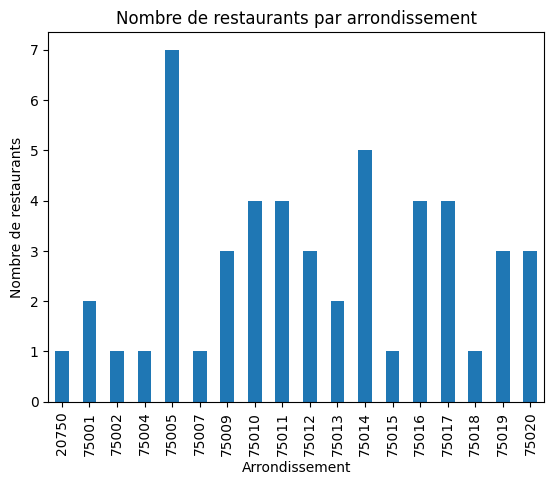

In [48]:
arrondissement_counts = df['Arrondissement'].value_counts().sort_index()
arrondissement_counts.plot(kind='bar', xlabel='Arrondissement', ylabel='Nombre de restaurants', title='Nombre de restaurants par arrondissement')
plt.show()

In [49]:
df


,Nom,Adresse,Note,Nombre d'avis,Arrondissement
0,Streaters,39 Rue Des Pyrénées Paris 20 Paris 20,0.6,263.0,20750
5,Délice Jussieu,4 rue LinnéParis 05,0.6,35.0,75005
16,Chez Les 4 Frères Bedri,38 Rue Louis BlancParis 10,0.6,23.0,75010
33,Le 32,32 Rue Des Belles FeuillesParis 16,0.6,20.0,75016
7,Taksim,170 avenue Jean JauresParis 19,0.6,3.0,75019
...,...,...,...,...,...
57,kebab Paris 09,41 kebabs référencés,NaN,NaN,NaN
58,kebab Paris 17,39 kebabs référencés,NaN,NaN,NaN
59,kebab Paris 15,36 kebabs référencés,NaN,NaN,NaN
60,kebab Paris 05,35 kebabs référencés,NaN,NaN,NaN
